# Data Science Portfolio: Road Accident Analysis - EDA and Data Cleaning

**Author:** Jasper Sylvestre  
**Date:** March 7, 2024

**Description:** This notebook showcases exploratory data analysis and data cleaning on road accident data available on __[Kaggle](https://www.kaggle.com/datasets/farshidbahrami021/road-accident-dataset)__ since February 28, 2024. A summary and list of conclusions are provided at the end. Note that this data set was randomly generated and is purely for learning purposes, but we will treat it here as a real-world data set.

**Version:** 1.1  
**Dependencies:**
- python 3.12.2
- ipykernel 6.29.3
- ipython 8.22.1
- jupyter_client 8.6.0
- jupyter_core 5.7.1
- matplotlib 3.8.3
- numpy 1.26.4
- pandas 2.2.0
- scikit-learn 1.4.1.post1
- scipy 1.12.0
- seaborn 0.13.2
- statsmodels 0.14.1

**Acknowledgments:**  
- Data set provided by Farshid Bahrami on Kaggle

**License:** MIT License  
**Contact:** jesylvestre0@gmail.com

# Introduction

This Jupyter notebook aims to perform Exploratory Data Analysis (EDA) and data cleaning on road accident data. The data set used here contains information about road accidents and serves as a foundation for deriving insights and building predictive models. This data set can be found __[here](https://www.kaggle.com/datasets/farshidbahrami021/road-accident-dataset)__ and was found on Kaggle. We can begin by importing necessary libraries to conduct data science procedures.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import statsmodels.api as sm
from scipy.stats import chi2_contingency, zscore
import warnings

# Loading the data

Next, we can load in the data. The file to read in is in the "xlsx" format, only containing one sheet. After reading in the data, we will examine the first five rows to begin to understand its structure. We can also examine the number of observations and total number of columns. We can see that there are 1610 observations and 23 columns.

There is also information given on the Kaggle page on this data set, which also confirms there are supposed to be 1610 observations. Descriptions are given for each column as well on the Kaggle page. It is also noted that some information has also been removed randomly to simulate real-world cases where some data will be missing.

Note that the Kaggle page, as of now, does indicate a lack of units for certain variables, such as speed limit, distance to nearest hospital, distance to nearest police station, and visibility. Some of these can potentially be inferred, but it is worth noting that if someone wanted to use this data set for modeling purposes, it would be useful to contact the maintainer of the data set on the units.

In [2]:
# Read data
file_path = "../data/road_accident_data.xlsx"
df = pd.read_excel(file_path)

# Examine data
print(f"This data set has: {len(df)} observations and {len(df.columns)} columns\n")
df.head(5)

This data set has: 1610 observations and 23 columns



,ID,State,Date,Day_of_Week,Time_of_Day,Weather_Conditions,Road_Conditions,Light_Conditions,Type_of_Road,Type_of_Junction,...,Num_Vehicles_Involved,Num_Casualties,Speed_Limit,Distance_to_Nearest_Hospital,Distance_to_Nearest_Police_Station,Visibility,Road_Width,Road_Surface_Friction_Coefficient,Vehicle_Speed,Time_Taken_for_Emergency_Response
0,165433,Connecticut,2024-02-20 05:46:20,Tuesday,19:59:02,Rainy,Muddy,Daylight,Street,T-Junction,...,2,3,57.0,3.303606,3.139351,485.649012,4.886202,0.904971,45.0,25.152781
1,165434,Massachusetts,2024-01-09 05:08:31,Wednesday,21:28:51,Sunny,Muddy,Daylight,Highway,Intersection,...,1,0,55.0,2.715327,3.634593,616.979936,4.677592,0.949236,41.0,23.163817
2,165435,Wyoming,2024-02-20 08:26:27,Thursday,18:04:26,Snowy,Snowy,Dawn,Street,Underpass,...,3,1,38.0,4.811429,9.631561,838.741654,9.926058,0.184447,64.0,6.697750
3,165436,Hawaii,2024-01-15 03:23:47,Sunday,16:51:02,Snowy,Icy,Daylight,Street,Intersection,...,5,0,59.0,6.976968,2.334468,842.441019,4.351822,0.195811,NaN,6.595036
4,165437,Oklahoma,2024-02-10 10:17:29,Tuesday,14:19:19,Foggy,Icy,Night,Rural,T-Junction,...,2,0,53.0,3.724599,4.359620,905.620263,6.626862,0.954821,81.0,22.913128


# Working with Time Variables

If we want to work with the `Date` and `Time_of_Day` variables for modeling, graphing, and understanding more simply, we want to convert this time data to time in numeric form. For `Date`, this data should first be converted to Unix time. Unix time represents the number of seconds that have elapsed since the Unix epoch (January 1, 1970). We can then start the data at 0 for the beginning and put the `Date` data into the number of days since the starting time, and this time is found to be 12:44:44 AM on January 1st, 2024.  We can also change the name of the `Date` column to match this change.

`Time_of_Day` can more simply just be converted into hours past since midnight. This will be done before investigating the data further.

In [3]:
# Working with Time Variables

## Display start time
print(f"The starting time is: {df["Date"].min()}\n")

## Convert Date to Unix time in seconds
df["Date"] = df["Date"].astype("int64") // 10**9
df["Date"] = (df["Date"] - df["Date"].min()) / (24*60*60)

## Rename Date
df.rename(columns={"Date": "Days_Since_Start"}, inplace=True)

## Convert Time_of_Day to time in days
df["Time_of_Day"] = pd.to_timedelta(df["Time_of_Day"]).dt.total_seconds() / (60*60)

## Display changed results
display(df[["Days_Since_Start", "Time_of_Day"]].head(5))

The starting time is: 2024-01-01 00:44:44



,Days_Since_Start,Time_of_Day
0,50.209444,19.983889
1,8.183183,21.480833
2,50.320637,18.073889
3,14.110451,16.850556
4,40.397743,14.321944


# Understanding the data

To gain deeper insights into the data set, we can examine the data set by examining the data types of each column. 10 of the columns are `object` variables, 3 are `int64`, and 10 are `float64`. This understanding will help us structure our analysis effectively.

For the numeric variables, we can quickly get an idea of the distributions for each one as well by showing their descriptive statistics. For `object`-type variables, we can gain additional insights by displaying their unique values and the total count of distinct values per column, not including missing values.

Additionally, we can calculate the total number of missing values per column. We can see that only six variables contain missing vales, four being numeric and the other two are categorical. This discrepancy in data types for missing values suggests the need for multiple methods of missing data imputation in our analysis.

In [4]:
# Understanding the data

## Data types for variables
print("Data types of variables:")
print(df.dtypes)

## Descriptive statistics for numeric variables
print("\nDescriptive statistics for numeric variables:")
numeric_stats = df.describe()
display(numeric_stats)

## Get unique values for each object variable
for column in df.columns:
    if df[column].dtype == "object":
        unique_values = df[column].dropna().unique()
        print(f"\nThere are {len(unique_values)} unique values in column '{column}':")
        print(unique_values)

## Missing values per column
print("\nMissing value counts per column:")
print(df.isnull().sum())

Data types of variables:
ID                                      int64
State                                  object
Days_Since_Start                      float64
Day_of_Week                            object
Time_of_Day                           float64
Weather_Conditions                     object
Road_Conditions                        object
Light_Conditions                       object
Type_of_Road                           object
Type_of_Junction                       object
Type_of_Accident                       object
Vehicle_Type                           object
Driver_Age_Group                       object
Num_Vehicles_Involved                   int64
Num_Casualties                          int64
Speed_Limit                           float64
Distance_to_Nearest_Hospital          float64
Distance_to_Nearest_Police_Station    float64
Visibility                            float64
Road_Width                            float64
Road_Surface_Friction_Coefficient     float64
Vehicle_S

,ID,Days_Since_Start,Time_of_Day,Num_Vehicles_Involved,Num_Casualties,Speed_Limit,Distance_to_Nearest_Hospital,Distance_to_Nearest_Police_Station,Visibility,Road_Width,Road_Surface_Friction_Coefficient,Vehicle_Speed,Time_Taken_for_Emergency_Response
count,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1457.000000,1610.000000,1610.000000,1610.000000,1453.000000,1610.000000,1433.000000,1444.000000
mean,166237.500000,29.781127,11.974569,3.062112,1.444099,50.144132,5.062241,5.049247,553.774075,6.537440,0.549663,49.933008,17.771576
std,464.911282,17.162561,6.938237,1.412848,1.155813,11.869475,2.890145,2.800700,258.589644,2.011750,0.259722,29.279972,7.245455
min,165433.000000,0.000000,0.004167,1.000000,0.000000,30.000000,0.113713,0.100520,100.224514,3.000363,0.100261,0.000000,5.032373
25%,165835.250000,14.900200,5.926042,2.000000,0.000000,40.000000,2.549658,2.708608,327.701610,4.773072,0.315058,24.000000,11.501425
50%,166237.500000,29.736013,12.158750,3.000000,1.000000,50.000000,5.151083,4.977115,557.361549,6.623199,0.550753,49.000000,17.498544
75%,166639.750000,44.689433,18.006111,4.000000,3.000000,60.000000,7.563470,7.474726,781.561590,8.284306,0.774580,76.000000,24.183088
max,167042.000000,59.032407,23.998889,5.000000,3.000000,70.000000,9.999620,9.998113,999.931342,9.996583,0.999489,100.000000,29.981212



There are 50 unique values in column 'State':
['Connecticut' 'Massachusetts' 'Wyoming' 'Hawaii' 'Oklahoma' 'Minnesota'
 'Nevada' 'North Dakota' 'Iowa' 'Rhode Island' 'Delaware' 'Idaho'
 'Florida' 'Utah' 'New Hampshire' 'Kansas' 'Colorado' 'Maryland'
 'Pennsylvania' 'California' 'Alabama' 'Georgia' 'New York' 'Ohio'
 'Washington' 'Tennessee' 'Mississippi' 'West Virginia' 'South Carolina'
 'Vermont' 'Oregon' 'Missouri' 'Alaska' 'Texas' 'New Jersey'
 'South Dakota' 'Maine' 'Virginia' 'Arizona' 'Indiana' 'Michigan'
 'Arkansas' 'Montana' 'North Carolina' 'Illinois' 'Nebraska' 'Louisiana'
 'Wisconsin' 'Kentucky' 'New Mexico']

There are 7 unique values in column 'Day_of_Week':
['Tuesday' 'Wednesday' 'Thursday' 'Sunday' 'Monday' 'Saturday' 'Friday']

There are 5 unique values in column 'Weather_Conditions':
['Rainy' 'Sunny' 'Snowy' 'Foggy' 'Stormy']

There are 5 unique values in column 'Road_Conditions':
['Muddy' 'Snowy' 'Icy' 'Wet' 'Dry']

There are 4 unique values in column 'Light_Conditio

# Checking for Duplicates

We can check for errors in the data set by checking for duplicates. We can see that there are no duplicates found in the data set if we include all variables in the check. The `ID` variable appears to be unique across the entire data set, so we can check for duplicates after removing the `ID`, since that could still be an issue. We can still see that there are 0 duplicates even after dropping `ID`. It does not appear that there are any errors in the data set as of yet.

In [5]:
print(f"There are {df.duplicated().sum()} duplicate entries across all variables.")
print(f"There are {df["ID"].nunique()} unique entries across the `ID` variable.")
print(f"There are {df.drop(columns="ID").duplicated().sum()} duplicate entries across all variables aside from `ID`.")

There are 0 duplicate entries across all variables.
There are 1610 unique entries across the `ID` variable.
There are 0 duplicate entries across all variables aside from `ID`.


# Handling missing data

Simply removing all observations including missing data would reduce the total number of observations to just 862, significantly reducing the amount of data there is to work with. If the absence of values actually held context-specific significance — such as unrecorded vehicle speeds possibly correlating with severe accidents for whatever reason — a more thoughtful approach to handling them could be warranted. Currently, we can construct a new data frame, `df_imputed`, and address missing values by replacing missing numeric data with the median and missing string values with the mode. We can also verify this correctly led to all observations now having no missing values.


In [6]:
# Handling missing data

## Print number of observations if all rows with missing data were removed
print(f"Number of observations if all rows with missing data were removed from `df`: {len(df.dropna())}")

## Create a new DataFrame with imputed values
df_imputed = df.copy()

## Impute missing values for numeric columns with median
numeric_columns = df_imputed.select_dtypes(include=np.number).columns
for col in numeric_columns:
    df_imputed.fillna({col: df_imputed[col].median()}, inplace=True)

## Impute missing values for string columns with mode
string_columns = df_imputed.select_dtypes(include="object").columns
for col in string_columns:
    df_imputed.fillna({col: df_imputed[col].mode()[0]}, inplace=True)

## Verify imputation was performed successfully
print(f"Number of observations if all rows missing data were removed from `df_imputed`: {len(df_imputed.dropna())}")

Number of observations if all rows with missing data were removed from `df`: 862
Number of observations if all rows missing data were removed from `df_imputed`: 1610


# Visualizing Numeric Variables

From the Kaggle page for this data set, the ID variable is merely a nominal numeric identifier, incrementing by 1 for each new record, starting at 165433. Therefore, further analysis of this variable is unnecessary. This is verified through code below.

We can visualize the remaining numerical variables using histograms along with a smoothed kernel. For integer variables indicating the number of vehicles involved and the number of casualties, a kernel is unnecessary due to the small number of possible values: 5 and 4 total possible values, respectively. For all values, kernel or not, we can examine that the values are relatively balanced across the center. There does not seem to be any skewness or extreme values for any numeric variable. For speed limit, road width, vehicle speed, and time taken for emergency response, the values do seem to be more often around the center. These were also all the variables where missing values were imputed for the median, so this is somewhat expected, and perhaps a different method of imputation should be taken.

Time seems to go from the beginning of 2024 to the creation of the data set around February 28, 2024, but it is unknown if this is the intention given the lack of information on the Kaggle page.

The ID column is equivalent to a list of 1610 numbers starting at 165433 incrementing by 1 each time.



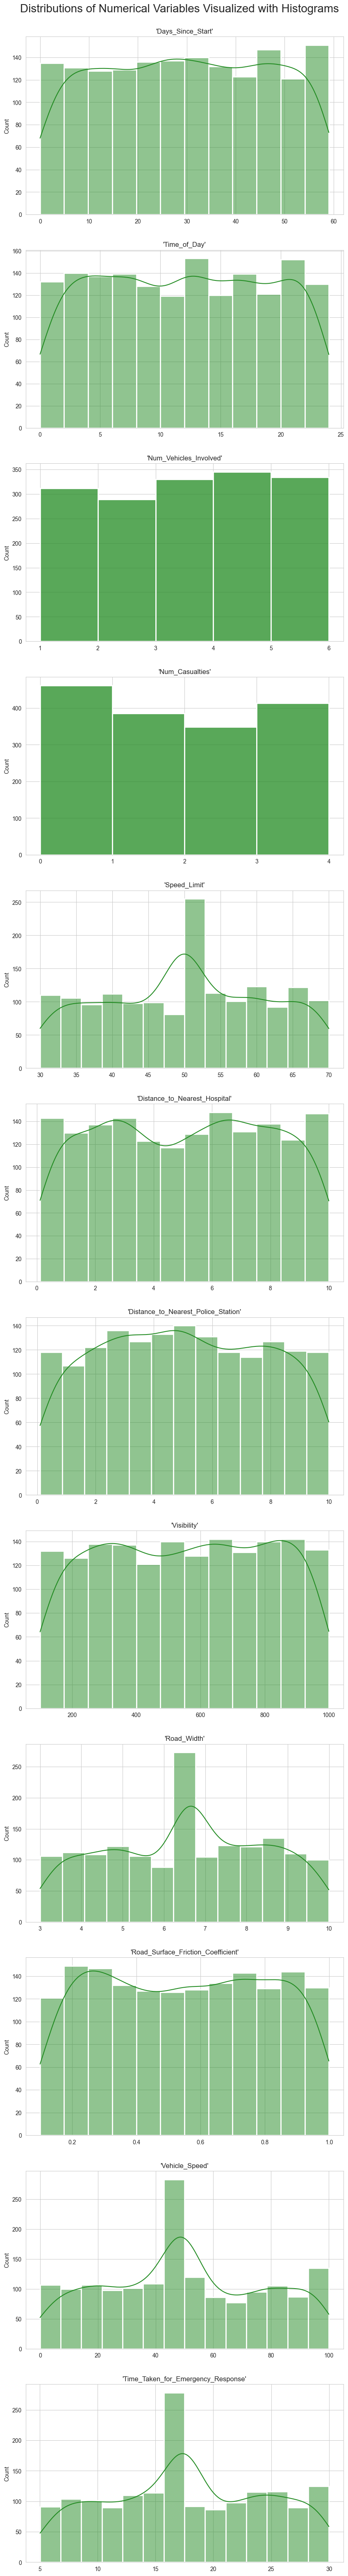

In [7]:
# Visualizing Numeric Variables

## Verify ID is not necessary to track.
if list(df_imputed["ID"]) == list(range(165433, 165433+1610)):
    print("The ID column is equivalent to a list of 1610 numbers starting at 165433 incrementing by 1 each time.\n")

## Get non-ID numeric columns
numeric_columns = df_imputed.drop(columns="ID").select_dtypes(include=np.number).columns

## Set up the style
sns.set_style("whitegrid")

## Create subplots based on the number of numeric variables
fig, axes = plt.subplots(nrows=len(numeric_columns), figsize=(10, 80))

## Set the overall title for the figure
fig.suptitle("Distributions of Numerical Variables Visualized with Histograms", fontsize=20, y=0.89)

## Iterate through each numeric column and plot a histogram
for idx, column in enumerate(numeric_columns):
    ## If the column is integer, use integer bins and do not use kernel, otherwise find bins automatically and use kernel
    if df_imputed[column].dtype == "int64":
        sns.histplot(data=df_imputed[column],
                     ax=axes[idx],
                     bins=range(int(df_imputed[column].min()),
                                int(df_imputed[column].max()) + 2),
                     kde=False,
                     color="forestgreen",
                     linewidth=2)
        axes[idx].xaxis.set_major_locator(plt.MaxNLocator(integer=True))
    else:
        sns.histplot(data=df_imputed[column],
                     ax=axes[idx],
                     bins="auto",
                     kde=True,
                     color="forestgreen",
                     linewidth=2)
    
    axes[idx].set_title(f"'{column}'")
    axes[idx].set_xlabel("")

## Show the plot
plt.show()

### Visualizing Numeric Variables continued

We can see that the distributions with the missing data still being contained are much more balanced. This implies that this method of data imputation does seem to at least visually disrupt the distributions of the data. The numerical data all seems to be roughly uniformly distributed with some patterns, e.g. speed limit values are more often being found at multiples of 10 or at 65, likely since these are just more common speed limits. We will now use a different form of data imputation to correct this.

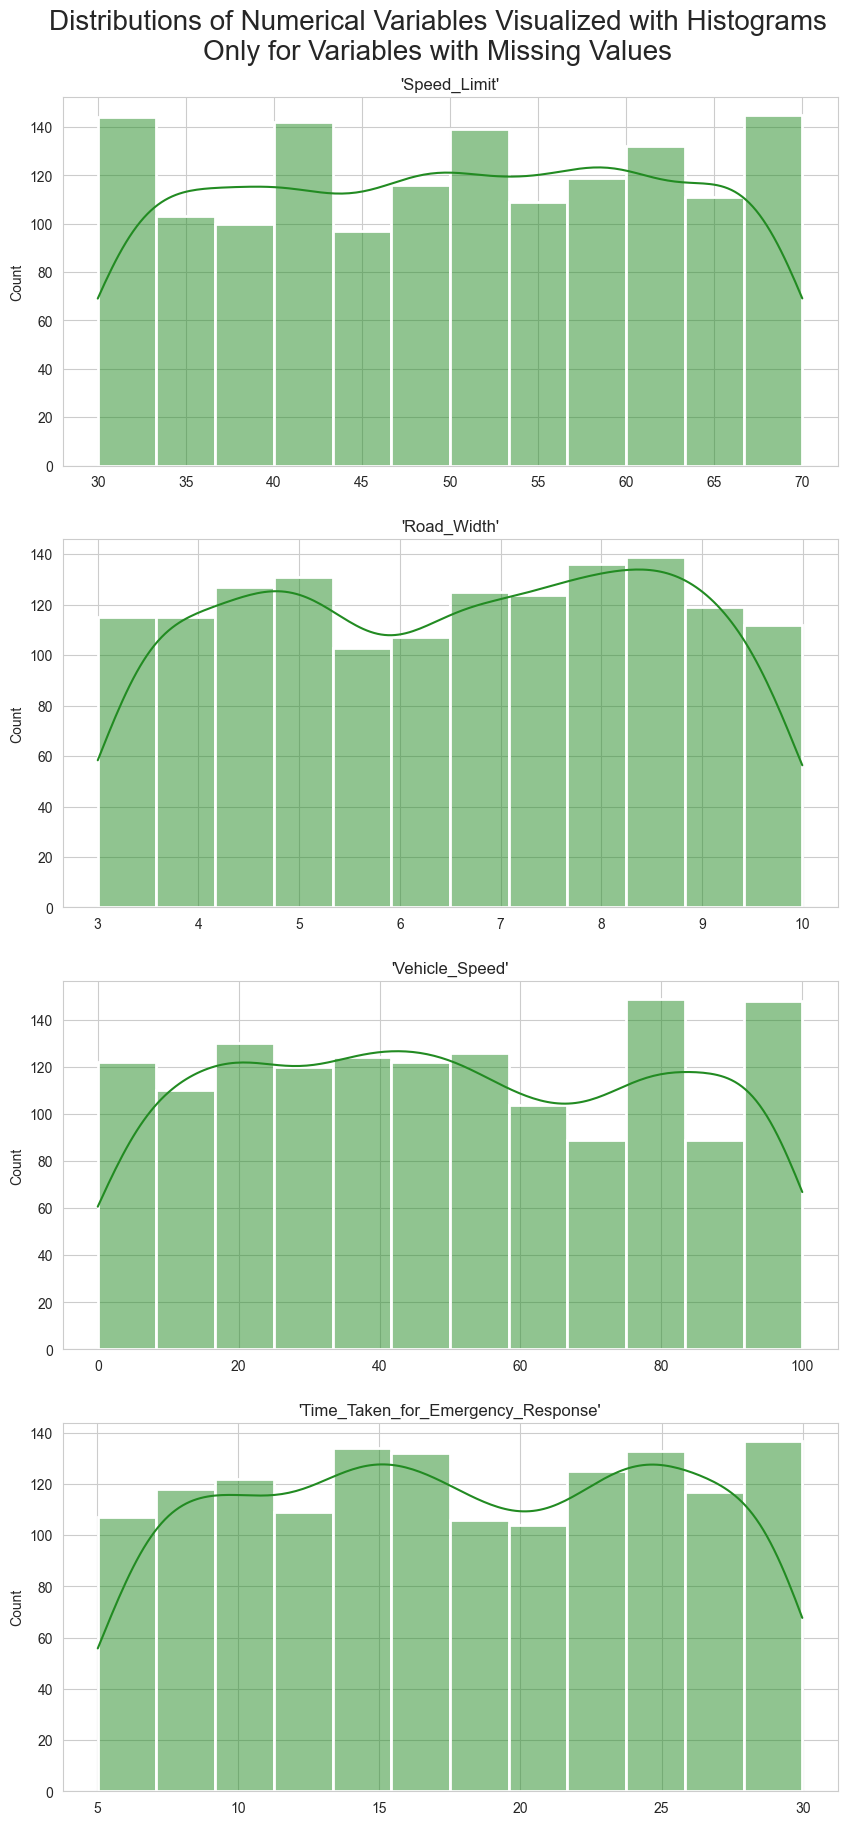

In [8]:
# Visualizing Numeric Variables continued

## Get numeric columns that had no missing values imputed
numeric_columns = df[["Speed_Limit", "Road_Width", "Vehicle_Speed", "Time_Taken_for_Emergency_Response"]].columns

## Set up the style
sns.set_style("whitegrid")

## Create subplots based on the number of numeric variables
fig, axes = plt.subplots(nrows=len(numeric_columns), figsize=(10, 22))

## Set the overall title for the figure
fig.suptitle("Distributions of Numerical Variables Visualized with Histograms\nOnly for Variables with Missing Values", fontsize=20, y=0.92)

## Iterate through each numeric column and plot a histogram
for idx, column in enumerate(numeric_columns):
    sns.histplot(data=df[column],
                     ax=axes[idx],
                     bins="auto",
                     kde=True,
                     color="forestgreen",
                     linewidth=2)
    
    axes[idx].set_title(f"'{column}'")
    axes[idx].set_xlabel("")

## Show the plot
plt.show()

### Visualizing Numeric Variables continued

We will use interpolation to impute the data instead and then revisualize the data with imputed values. This seems to have much more balanced results. Now all the numeric data seems to be roughly uniformly distributed whether the missing values are imputed or not.

Number of observations if all rows missing data were removed from `df_interp`: 1610



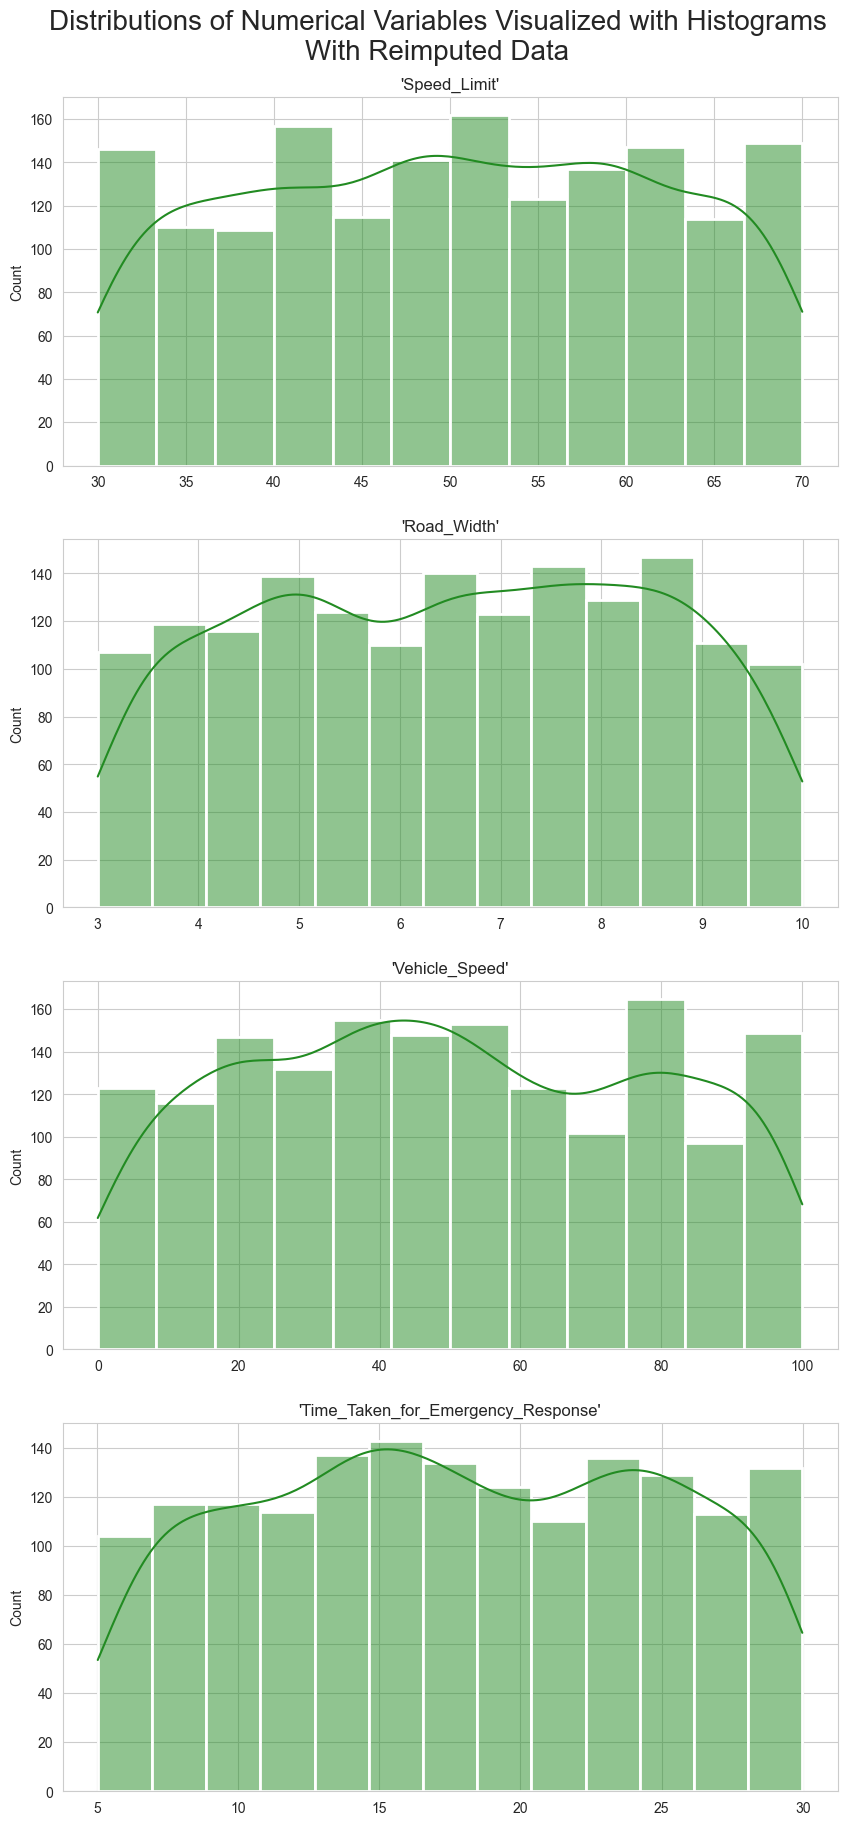

In [9]:
# Visualizing Numeric Variables continued

## Fill in missing values
df_interp = df.copy()

### Impute missing values for categorical columns with mode
string_columns = df_interp.select_dtypes(include="object").columns
for col in string_columns:
    df_interp.fillna({col: df_interp[col].mode()[0]}, inplace=True)
    
### Use interpolation
### Suppress irrelevant warning
warnings.filterwarnings("ignore")
df_interp = df_interp.interpolate(method="linear")
warnings.filterwarnings("default")

### Verify imputation was performed successfully
print(f"Number of observations if all rows missing data were removed from `df_interp`: {len(df_interp.dropna())}\n")

## Get numeric columns
numeric_columns = df_interp[["Speed_Limit", "Road_Width", "Vehicle_Speed", "Time_Taken_for_Emergency_Response"]].columns

## Set up the style
sns.set_style("whitegrid")

## Create subplots based on the number of numeric variables
fig, axes = plt.subplots(nrows=len(numeric_columns), figsize=(10, 22))

## Set the overall title for the figure
fig.suptitle("Distributions of Numerical Variables Visualized with Histograms\nWith Reimputed Data", fontsize=20, y=0.92)

## Iterate through each numeric column and plot a histogram
for idx, column in enumerate(numeric_columns):
    sns.histplot(data=df_interp[column],
                     ax=axes[idx],
                     bins="auto",
                     kde=True,
                     color="forestgreen",
                     linewidth=2)
    
    axes[idx].set_title(f"'{column}'")
    axes[idx].set_xlabel("")

## Show the plot
plt.show()

# Visualizing Categorical Variables

We notice a similar problem here. Data imputation of the mode has seemed to cause spikes in certain parts of the data for weather conditions and type of junction, both where there was missing data. This could indicate a different method of imputation should be taken here. Past that, the state does vary quite a bit. This could indicate something based on exactly what this data means, e.g. if these were all the car accidents in the U.S. in all 50 states up to a certain point in 2024, but it is currently unknown if this has any significance given the Kaggle page does not specify. For all other variables, however, the data is roughly balanced to resemble an approximate uniform distribution.

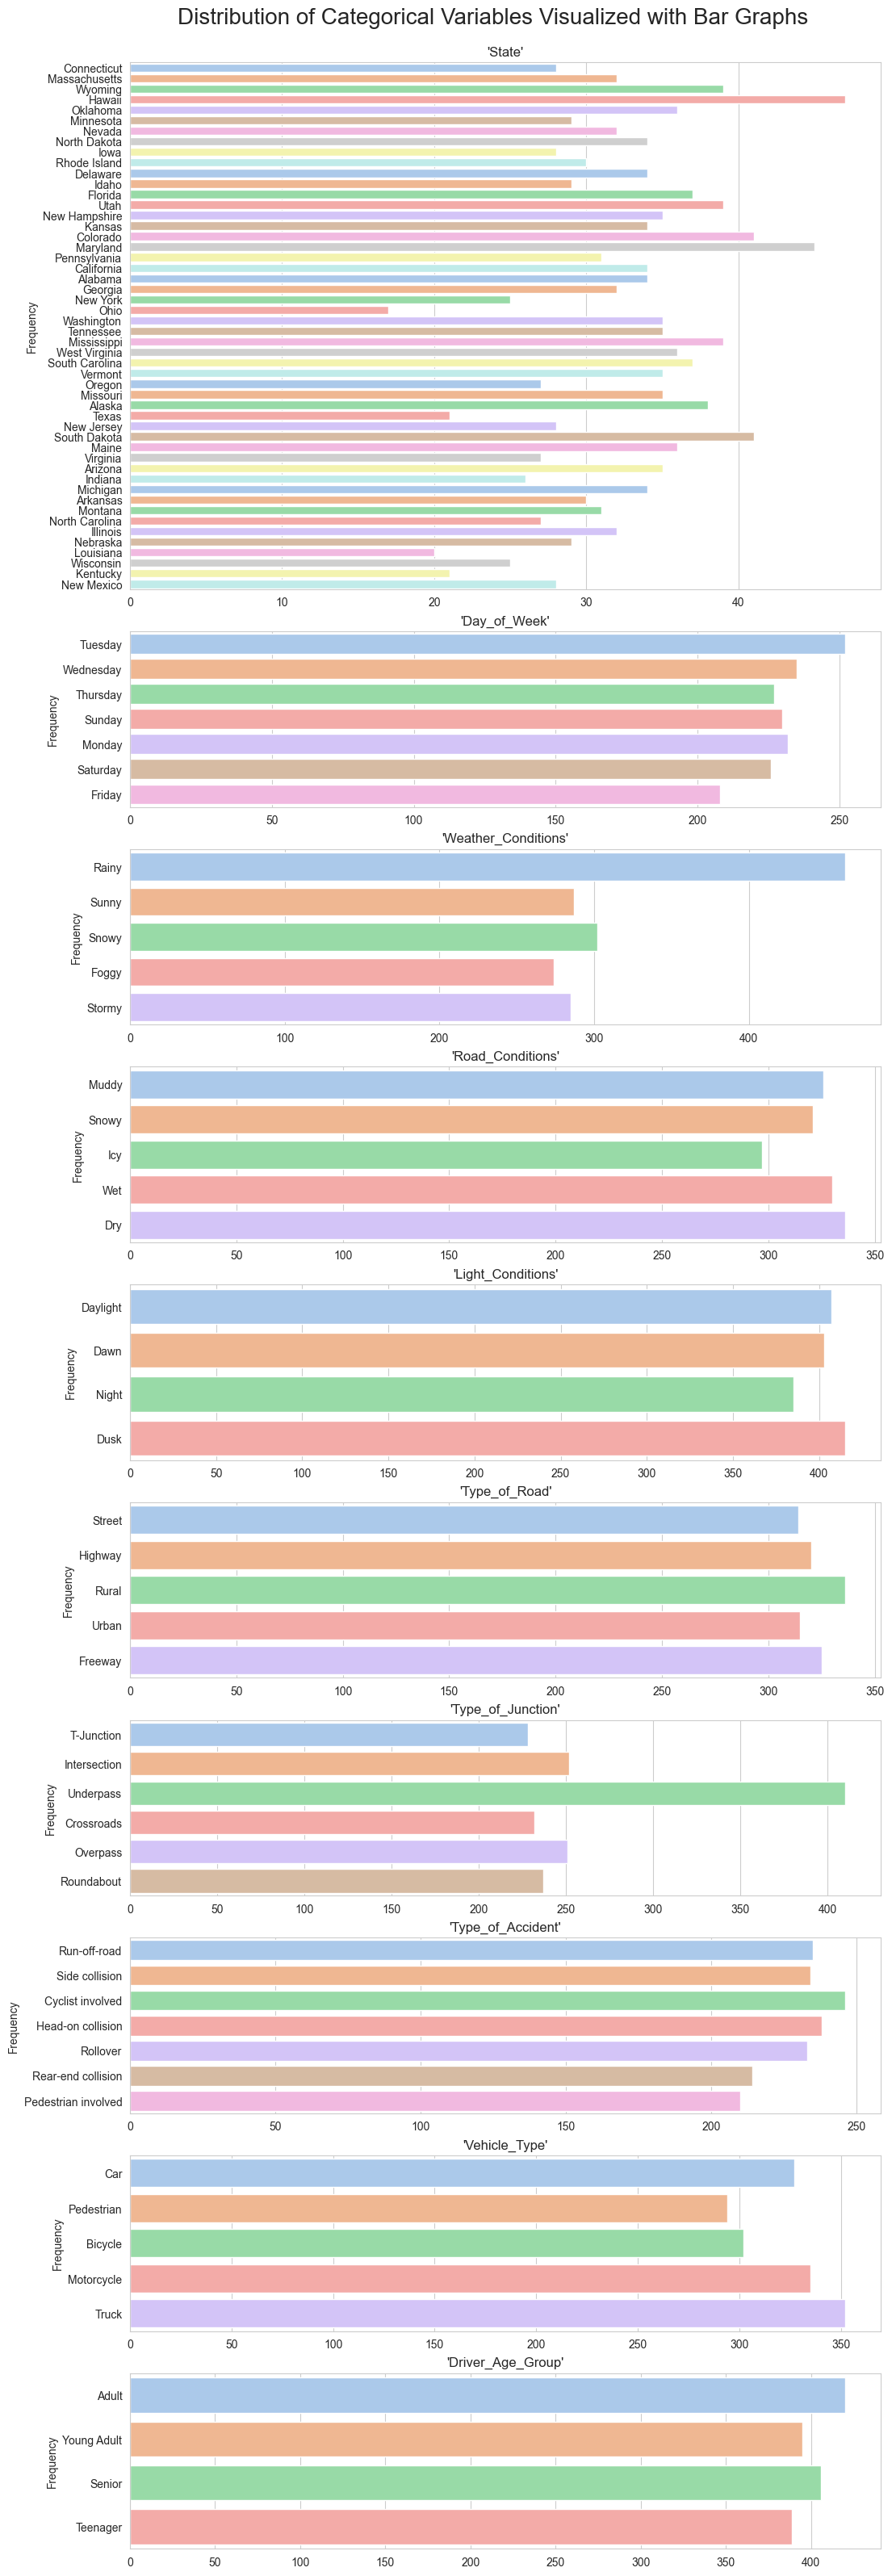

In [10]:
# Visualizing Categorical Variables

## Get categorical columns
categorical_columns = df_interp.select_dtypes(include="object").columns

## Set up the style
sns.set_style("whitegrid")

## Create subplots based on the number of categorical variables
fig, axes = plt.subplots(nrows=len(categorical_columns),
                         figsize=(12, 40),
                         gridspec_kw={"height_ratios": [3, 1, 1, 1, 1, 1, 1, 1, 1, 1]})

## Set the overall title for the figure
fig.suptitle("Distribution of Categorical Variables Visualized with Bar Graphs", fontsize=20, y=0.897)

## Iterate through each categorical column and plot a count plot
for idx, column in enumerate(categorical_columns):
    sns.countplot(data=df_interp,
                  y=column,
                  hue=column,
                  ax=axes[idx],
                  palette="pastel",
                  legend=False)
    axes[idx].set_title(f"'{column}'")
    axes[idx].set_xlabel("")
    axes[idx].set_ylabel("Frequency")

## Show the plot
plt.show()

### Visualizing Categorical Variables continued

We can see, again, that using a highly simple method of imputation is having the drawback of causing a false spike in the distributions of the graphs where none is naturally found. We will now use a different method of data imputation.

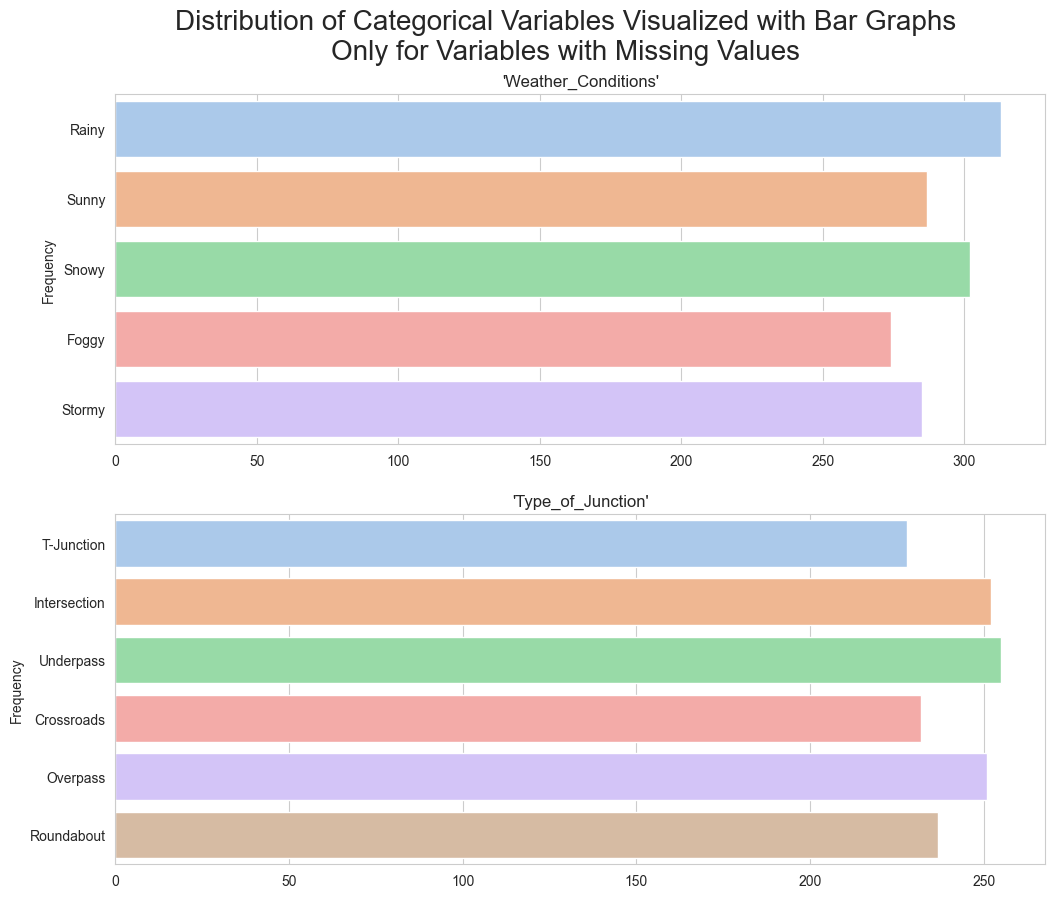

In [11]:
# Visualizing Categorical Variables continued

## Get categorical columns that had no missing values imputed
categorical_columns = df[["Weather_Conditions", "Type_of_Junction"]].columns

## Set up the style
sns.set_style("whitegrid")

## Create subplots based on the number of categorical variables
fig, axes = plt.subplots(nrows=len(categorical_columns),
                         figsize=(12, 10))

## Set the overall title for the figure
fig.suptitle("Distribution of Categorical Variables Visualized with Bar Graphs\nOnly for Variables with Missing Values", fontsize=20, y=0.965)

## Iterate through each categorical column and plot a count plot
for idx, column in enumerate(categorical_columns):
    sns.countplot(data=df,
                  y=column,
                  hue=column,
                  ax=axes[idx],
                  palette="pastel",
                  legend=False)
    axes[idx].set_title(f"'{column}'")
    axes[idx].set_xlabel("")
    axes[idx].set_ylabel("Frequency")

## Show the plot
plt.show()

### Visualizing Categorical Variables continued

Once again, it is evident that using a simplistic imputation method results in an artificial spike in the distribution graphs where none naturally exists. We will now adopt an alternative approach to data imputation using a random forest classifier. This seems to have significantly improved the overall balance of the data, and we have effectively addressed all missing values to a satisfactory extent for now.

Number of observations if all rows missing data were removed from `df_imputed_2`: 1610



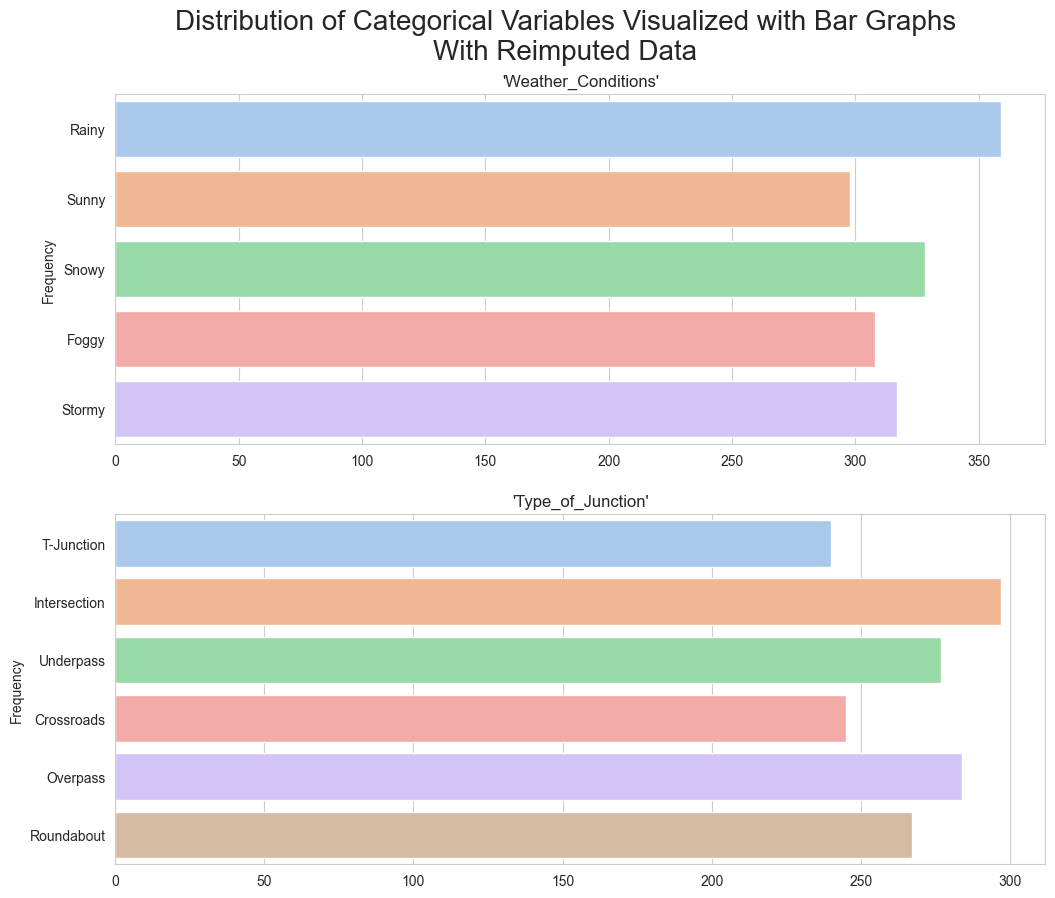

In [12]:
# Visualizing Numeric Variables continued

## Add seed for reproducability
RANDOM_SEED = 123

## Add back in missing values
df_interp["Weather_Conditions"] = df["Weather_Conditions"]
df_interp["Type_of_Junction"] = df["Type_of_Junction"]

## Fill in missing values using random forests
missing_columns = ["Weather_Conditions", "Type_of_Junction"]
categorical_columns = ["State", "Day_of_Week", "Road_Conditions", "Light_Conditions", "Type_of_Road", "Type_of_Accident", "Vehicle_Type", "Driver_Age_Group"] # Cannot use for random forests
complete_df = df_interp.dropna(subset=missing_columns).drop(columns=categorical_columns)
incomplete_df = df_interp[df_interp.isnull().any(axis=1)].drop(columns=categorical_columns)

## Get training and test data
X_train = complete_df.drop(missing_columns, axis=1)
y_train = complete_df[missing_columns]
X_test = incomplete_df.drop(missing_columns, axis=1)

## Train RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100,
                                       random_state=RANDOM_SEED)

rf_classifier.fit(X_train, y_train)

## Predict missing values
predicted_values = rf_classifier.predict(X_test)

## Update the DataFrame with predicted values
incomplete_df[missing_columns] = predicted_values
df_imputed_2 = pd.concat([complete_df, incomplete_df])
categorical_columns.append("ID") # Use as key for adding back categorical variables
df_imputed_2 = pd.merge(df_imputed_2, df_interp[categorical_columns], on="ID")

### Verify imputation was performed successfully
print(f"Number of observations if all rows missing data were removed from `df_imputed_2`: {len(df_imputed_2.dropna())}\n")

## Get categorical columns
categorical_columns = df_imputed_2[["Weather_Conditions", "Type_of_Junction"]].columns

## Set up the style
sns.set_style("whitegrid")

## Create subplots based on the number of categorical variables
fig, axes = plt.subplots(nrows=len(categorical_columns),
                         figsize=(12, 10))

## Set the overall title for the figure
fig.suptitle("Distribution of Categorical Variables Visualized with Bar Graphs\nWith Reimputed Data", fontsize=20, y=0.965)

## Iterate through each categorical column and plot a count plot
for idx, column in enumerate(categorical_columns):
    sns.countplot(data=df_imputed_2,
                  y=column,
                  hue=column,
                  ax=axes[idx],
                  palette="pastel",
                  legend=False)
    axes[idx].set_title(f"'{column}'")
    axes[idx].set_xlabel("")
    axes[idx].set_ylabel("Frequency")

## Show the plot
plt.show()

# Checking For Outliers

Only using visual inspection, there do not appear to be any outliers among the numeric variables. We can analyze this further by examining potential outliers not seen in plots using Z-score method, a robut technique for detecting outliers. Applying this method, no outliers are found among the numeric variables.

In [13]:
# Compute summary statistics
numeric_variables = df.select_dtypes(include=np.number)

# Check for outliers
for col in numeric_variables:
    z_scores = zscore(df[col])
    outlier_indices = np.where(np.abs(z_scores) > 3)[0]
    print(f"There are {len(outlier_indices)} outliers in the '{col}' variable.")

There are 0 outliers in the 'ID' variable.
There are 0 outliers in the 'Days_Since_Start' variable.
There are 0 outliers in the 'Time_of_Day' variable.
There are 0 outliers in the 'Num_Vehicles_Involved' variable.
There are 0 outliers in the 'Num_Casualties' variable.
There are 0 outliers in the 'Speed_Limit' variable.
There are 0 outliers in the 'Distance_to_Nearest_Hospital' variable.
There are 0 outliers in the 'Distance_to_Nearest_Police_Station' variable.
There are 0 outliers in the 'Visibility' variable.
There are 0 outliers in the 'Road_Width' variable.
There are 0 outliers in the 'Road_Surface_Friction_Coefficient' variable.
There are 0 outliers in the 'Vehicle_Speed' variable.
There are 0 outliers in the 'Time_Taken_for_Emergency_Response' variable.


# Data Transformation

The data appears to be clean without any noticable errors, missing values have been handled, and there do not seem to be significant outliers. This leaves data transformation to be done.

Regarding numerical data, it will be standardized into its own data frame `df_num_std` and `ID` will be kept the same to be used as a key for potential data merges. The data itself will be ready for a correlation matrix.

For categorical variables, one hot encoding will be performed into its own data frame `df_var_encoded` and `ID` will be kept similarly. This will lead to the creation of approximately 100 columns in total, making braod analysis difficult to perform but useful for modeling with. `df_var` will also be kept for bivariate analysis later on.

In [14]:
# Standardization

## Prepare numeric data
df_num = df_imputed_2.select_dtypes(include=np.number)

## Calculate mean and standard deviation for each column
mean_values = df_num.mean()
std_values = df_num.std()

## Keep ID variable the same
mean_values["ID"] = 0
std_values["ID"] = 1

## Standardize each column
df_num_std = (df_num - mean_values) / std_values

## Display
display(df_num_std)

# One hot encode categorical variables

## Prepare categorical data
df_var = df_imputed_2.select_dtypes(include=["int64", "object"]).drop(columns=["Num_Casualties", "Num_Vehicles_Involved"]) # Keep ID but not other int64 variables

## One hot encode
df_var_encoded = pd.get_dummies(df_var, dtype=int)

## Display
display(df_var_encoded)

,ID,Days_Since_Start,Time_of_Day,Num_Vehicles_Involved,Num_Casualties,Speed_Limit,Distance_to_Nearest_Hospital,Distance_to_Nearest_Police_Station,Visibility,Road_Width,Road_Surface_Friction_Coefficient,Vehicle_Speed,Time_Taken_for_Emergency_Response
0,165433.0,1.190284,1.154374,-0.751752,1.346153,0.590694,-0.608494,-0.681935,-0.263449,-0.836722,1.368032,-0.171374,1.048780
1,165434.0,-1.258434,1.370127,-1.459542,-1.249423,0.417970,-0.812040,-0.505107,0.244425,-0.943242,1.538465,-0.312190,0.767453
2,165435.0,1.196762,0.879088,-0.043962,-0.384231,-1.050182,-0.086782,1.636132,1.102007,1.736723,-1.406183,0.497503,-1.561571
3,165436.0,-0.913073,0.702770,1.371618,-1.249423,0.763418,0.662502,-0.969322,1.116313,-1.109587,-1.362427,0.796737,-1.576099
4,165437.0,0.618592,0.338325,-0.751752,-1.249423,0.245246,-0.462829,-0.246234,1.360635,0.052091,1.559970,1.095972,0.731995
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1605,167015.0,-0.320927,0.148555,-1.459542,1.346153,0.158884,1.028968,-0.267745,1.566196,-0.834416,0.530715,-1.649944,0.832990
1606,167017.0,0.867957,0.434170,-0.751752,-0.384231,1.108865,1.580833,1.638789,1.393618,1.230101,1.592614,-0.417802,1.570170
1607,167024.0,0.289165,-0.091540,1.371618,0.480961,-0.143382,1.351032,-0.085752,1.453889,-0.762750,-1.299815,1.729645,-0.886752
1608,167027.0,-0.594817,-0.796450,0.663828,1.346153,1.195227,-0.796970,0.372491,-0.926424,1.729883,0.055880,1.201584,-0.618273


,ID,Weather_Conditions_Foggy,Weather_Conditions_Rainy,Weather_Conditions_Snowy,Weather_Conditions_Stormy,Weather_Conditions_Sunny,Type_of_Junction_Crossroads,Type_of_Junction_Intersection,Type_of_Junction_Overpass,Type_of_Junction_Roundabout,...,Type_of_Accident_Side collision,Vehicle_Type_Bicycle,Vehicle_Type_Car,Vehicle_Type_Motorcycle,Vehicle_Type_Pedestrian,Vehicle_Type_Truck,Driver_Age_Group_Adult,Driver_Age_Group_Senior,Driver_Age_Group_Teenager,Driver_Age_Group_Young Adult
0,165433,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,165434,0,0,0,0,1,0,1,0,0,...,1,0,0,0,1,0,1,0,0,0
2,165435,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,165436,0,0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
4,165437,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1605,167015,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,1,0,0,0
1606,167017,0,1,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
1607,167024,0,0,0,0,1,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
1608,167027,0,1,0,0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0


# Bivariate Analysis - Correlation Matrix

We can use the standardized numerical data to construct a correlation matrix and heatmap. This is done to examine potential linear correlations between numeric variables. However, no significant positive or negative correlation coefficients appear to exist among any pair of numerical variables. Therefore, there does not seem to be any issues regarding multicollinearity for potential models.


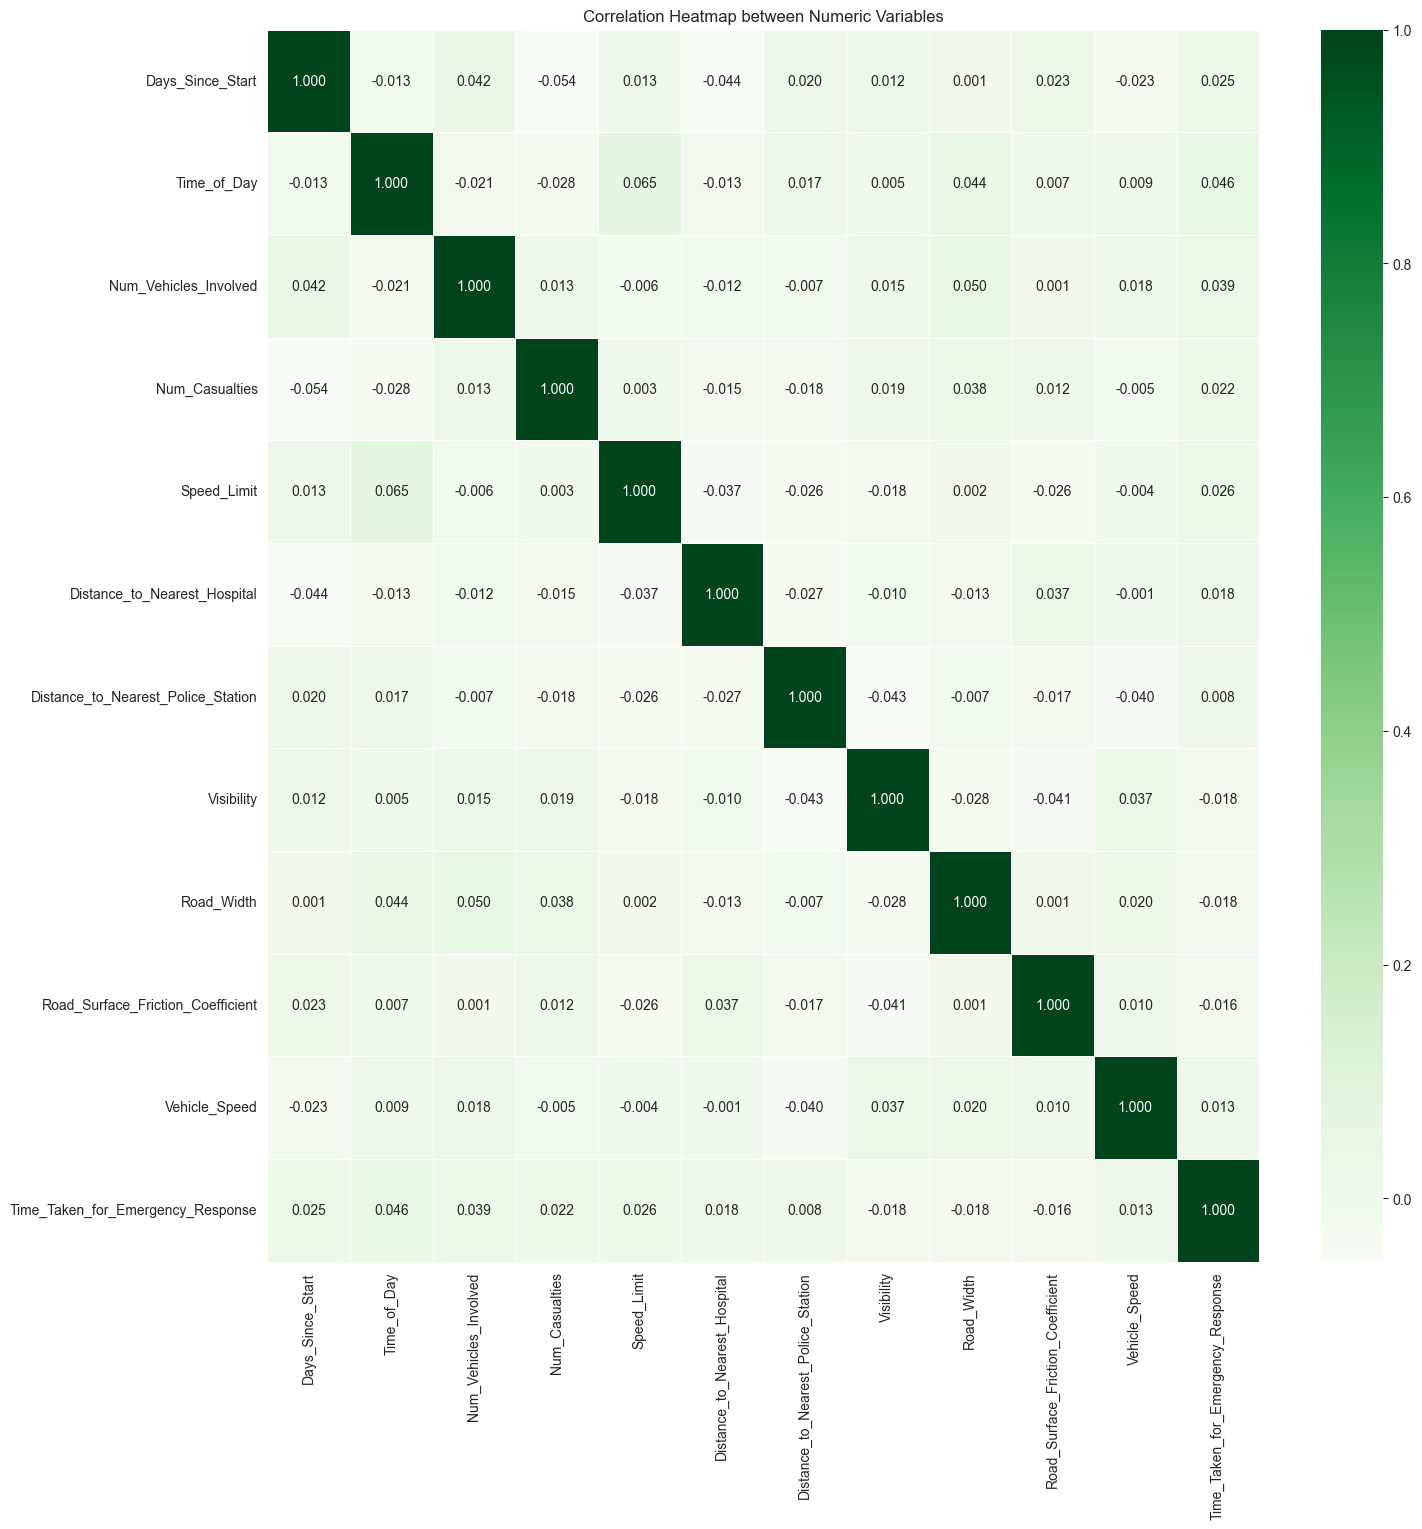

In [15]:
# Create correlation matrix
corr_matrix = df_num_std.drop(columns="ID").corr()

# Create the heatmap
plt.figure(figsize=(16, 16))
sns.heatmap(corr_matrix, annot=True, cmap="Greens", fmt=".3f", linewidths=0.5)
plt.title("Correlation Heatmap between Numeric Variables")
plt.show()

# Bivariate Analysis - Chi-Square testing

We can use `df_var` to perform Chi-Square testing to examine the relationship between two categorical variables. We will use this test to determine if there is a significant association between a pair of categorical variables based on the observed and expected frequencies in a contingency table. Since there are 10 categorical variables, there are 10 choose 2 (45) total combinations.

We can see that only one result is significant at the significane level of 0.05, but since there are so many tests in total and 5% should be significant from chance alone, meaning 1 or 2 results appearing statistically significant out of chance is expected, so this likely holds little meaning without further analysis. This result was found between road condition and driver age group.

In [16]:
# Get categorical variables
categorical_columns = df_var.drop(columns="ID").columns

# Perform Chi-square tests for each pair of categorical variables
for i in range(len(categorical_columns)):
    for j in range(i+1, len(categorical_columns)):
        # Make contigency table and perform test
        contingency_table = pd.crosstab(df_var[categorical_columns[i]], df_var[categorical_columns[j]])
        chi2, p_value, dof, expected = chi2_contingency(contingency_table)
        
        # Display results
        print(f"Chi-square test between {categorical_columns[i]} and {categorical_columns[j]}:")
        print(f"Chi-square statistic: \t{chi2:.2f}")
        
        flag = "***" if p_value < 0.05 else "" # Flag significant results
        print(f"P-value: \t\t{p_value:.2f}{flag}\n")

Chi-square test between Weather_Conditions and Type_of_Junction:
Chi-square statistic: 	20.72
P-value: 		0.41

Chi-square test between Weather_Conditions and State:
Chi-square statistic: 	179.56
P-value: 		0.79

Chi-square test between Weather_Conditions and Day_of_Week:
Chi-square statistic: 	30.94
P-value: 		0.16

Chi-square test between Weather_Conditions and Road_Conditions:
Chi-square statistic: 	20.29
P-value: 		0.21

Chi-square test between Weather_Conditions and Light_Conditions:
Chi-square statistic: 	13.16
P-value: 		0.36

Chi-square test between Weather_Conditions and Type_of_Road:
Chi-square statistic: 	20.68
P-value: 		0.19

Chi-square test between Weather_Conditions and Type_of_Accident:
Chi-square statistic: 	23.25
P-value: 		0.51

Chi-square test between Weather_Conditions and Vehicle_Type:
Chi-square statistic: 	18.91
P-value: 		0.27

Chi-square test between Weather_Conditions and Driver_Age_Group:
Chi-square statistic: 	6.41
P-value: 		0.89

Chi-square test between Ty

# Dimension Reduction through Principal Component Analysis (PCA)

We are planning to conduct PCA for several reasons. Firstly, the da taset resulting from one-hot encoding combined with the numeric da taset will contain a total of 110 variables (after dropping `ID`), which would lead to many challenges in analysis due to its high dimensionality. PCA enables us to identify the most significant features within the da taset, leading to a clearer understanding and interpretation of relationships. Past that, PCA helps in reducing redundant data, streamlining the da taset for further analysis.

Furthermore, PCA aids in preparing the data for modeling, working to fix issues and challenges such as overfitting, excessive complexity, an overly high dimensionality. By reducing the number of dimensions, PCA can improve the generalization ability of models and enhance computational efficiency.

Upon visual inspection the cumulative variance explain seems to increase very slow for this data set. Depending on the type of analysis conducted using this data set, greater or fewer principle components would be desired. A data frame where the cumulative variance explained is at least 70% is saved, but the code could be easily modby changing the `desired_cve` variable ified for the data frame to ctained 80%, 90%, 95%, etc. cumulative variance explained.

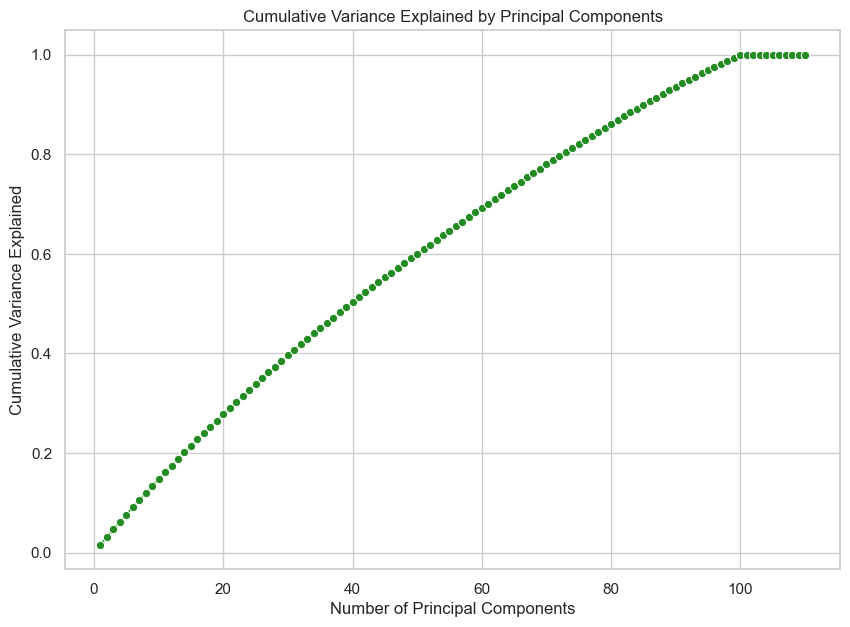

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC51,PC52,PC53,PC54,PC55,PC56,PC57,PC58,PC59,PC60
0,0.132408,2.372390,-0.661211,-0.827356,0.511251,0.340138,0.567397,-0.175330,2.794661,-2.252746,...,-0.116080,-0.635239,0.204718,-0.751095,1.286595,-0.587086,1.150503,-0.477828,-0.474551,-0.813486
1,0.112609,-1.938760,0.009070,1.296407,-0.699250,-0.554490,0.177378,-0.832076,2.184510,-0.850781,...,1.967128,-1.265960,-0.501838,-0.350200,0.574095,0.044844,0.951259,2.290206,-0.922262,-0.856412
2,-0.736714,-0.387379,-1.978042,-0.936720,-0.384228,-1.812409,1.396158,2.383413,-1.569869,-0.551606,...,-0.043077,0.935081,0.448779,-0.334193,1.336075,0.147800,-1.892902,-1.956756,-0.425115,-0.580192
3,0.563159,-0.384170,0.778694,-2.135332,0.712077,1.397111,0.301699,0.433640,-0.770569,-1.173335,...,-0.675331,-0.529399,1.765129,0.371415,-0.216825,-0.112909,-1.138311,0.312696,-1.086590,-1.023462
4,0.263706,0.372434,0.361959,0.892124,-0.852971,0.355796,2.486052,-1.620222,0.573900,0.396701,...,-0.351306,-0.297288,-1.001671,-0.108033,-0.473300,1.076374,-0.781798,-0.470636,-0.106477,-0.063264
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1605,1.816199,-0.054822,2.045019,0.198109,-1.078253,-0.689723,0.743576,-1.615352,1.025503,0.774771,...,2.329886,0.393405,1.109699,0.283204,1.252071,1.082091,0.893466,-0.671269,0.718735,-0.640122
1606,-0.131870,1.858975,-0.714272,-0.097088,0.711088,2.606610,-0.883925,-0.927937,0.069784,-0.222137,...,0.012296,-0.261394,0.657679,0.029949,-2.166057,0.008843,0.606142,0.232659,0.105594,-0.053277
1607,2.304321,-1.805719,-0.402701,-0.847181,-0.023197,0.036086,0.216875,0.975674,0.664756,0.741821,...,-0.133766,0.851848,0.496188,-0.599478,0.891251,0.194855,-0.832520,-1.518975,-0.346300,-0.705520
1608,1.701968,1.165010,0.847047,-0.826353,0.323146,1.322992,0.704415,2.227800,1.815117,0.785896,...,-0.359805,0.822044,-1.763301,0.135904,-0.545601,-1.023590,-0.627333,-0.541413,-1.443938,0.256322


In [17]:
# Dimension reduction

## Combine data and scale
df_combined = pd.merge(df_var_encoded, df_num_std, on="ID").drop(columns="ID") # ID does not add to the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_combined)

## Apply PCA
pca = PCA()
principal_components = pca.fit_transform(scaled_data)

## Find cumulative variance explained
cumulative_variance_explained = np.cumsum(pca.explained_variance_ratio_)

## Plot cumulative variance explained
sns.set(style="whitegrid")
plt.figure(figsize=(10, 7))
sns.lineplot(x=range(1, len(cumulative_variance_explained) + 1), y=cumulative_variance_explained, marker="o", color="forestgreen")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Variance Explained")
plt.title("Cumulative Variance Explained by Principal Components")
plt.grid(True)
plt.show()

## Save data frame of desired cumulative variance explained
desired_cve = 0.7
index_desired_percent = np.where(cumulative_variance_explained >= desired_cve)[0][0]
pca_df = pd.DataFrame(principal_components[:, :index_desired_percent])

## Fix column names
pca_column_names = [f"PC{i}" for i in range(1, index_desired_percent+1)]
pca_df.columns = pca_column_names
display(pca_df)

# Modeling Implications

Using principle component analysis only on the numeric variables, we can examine that while using fewer variables, a data frame can still contain at least 70% of the cumulative variance explained of the original data. This allows pairwise relationships to be easier to examine with less variables overall. Upon visual inspection, the pairwise plots reveal what appears to be random scatter and no discernible relationships between the pairs of variables. This data is in agreement with the results of the correlation matrix from before.

Past that, with the Chi-square testing already done, there seems to be minimal, if any, apparent pair-wise relationships between categorical variables. This makes apparent that focus needs to be taken on individual contributions to the data over inter-variable relationships, and likely further analysis and more feature engineering would need to be done to derive insights for modeling.

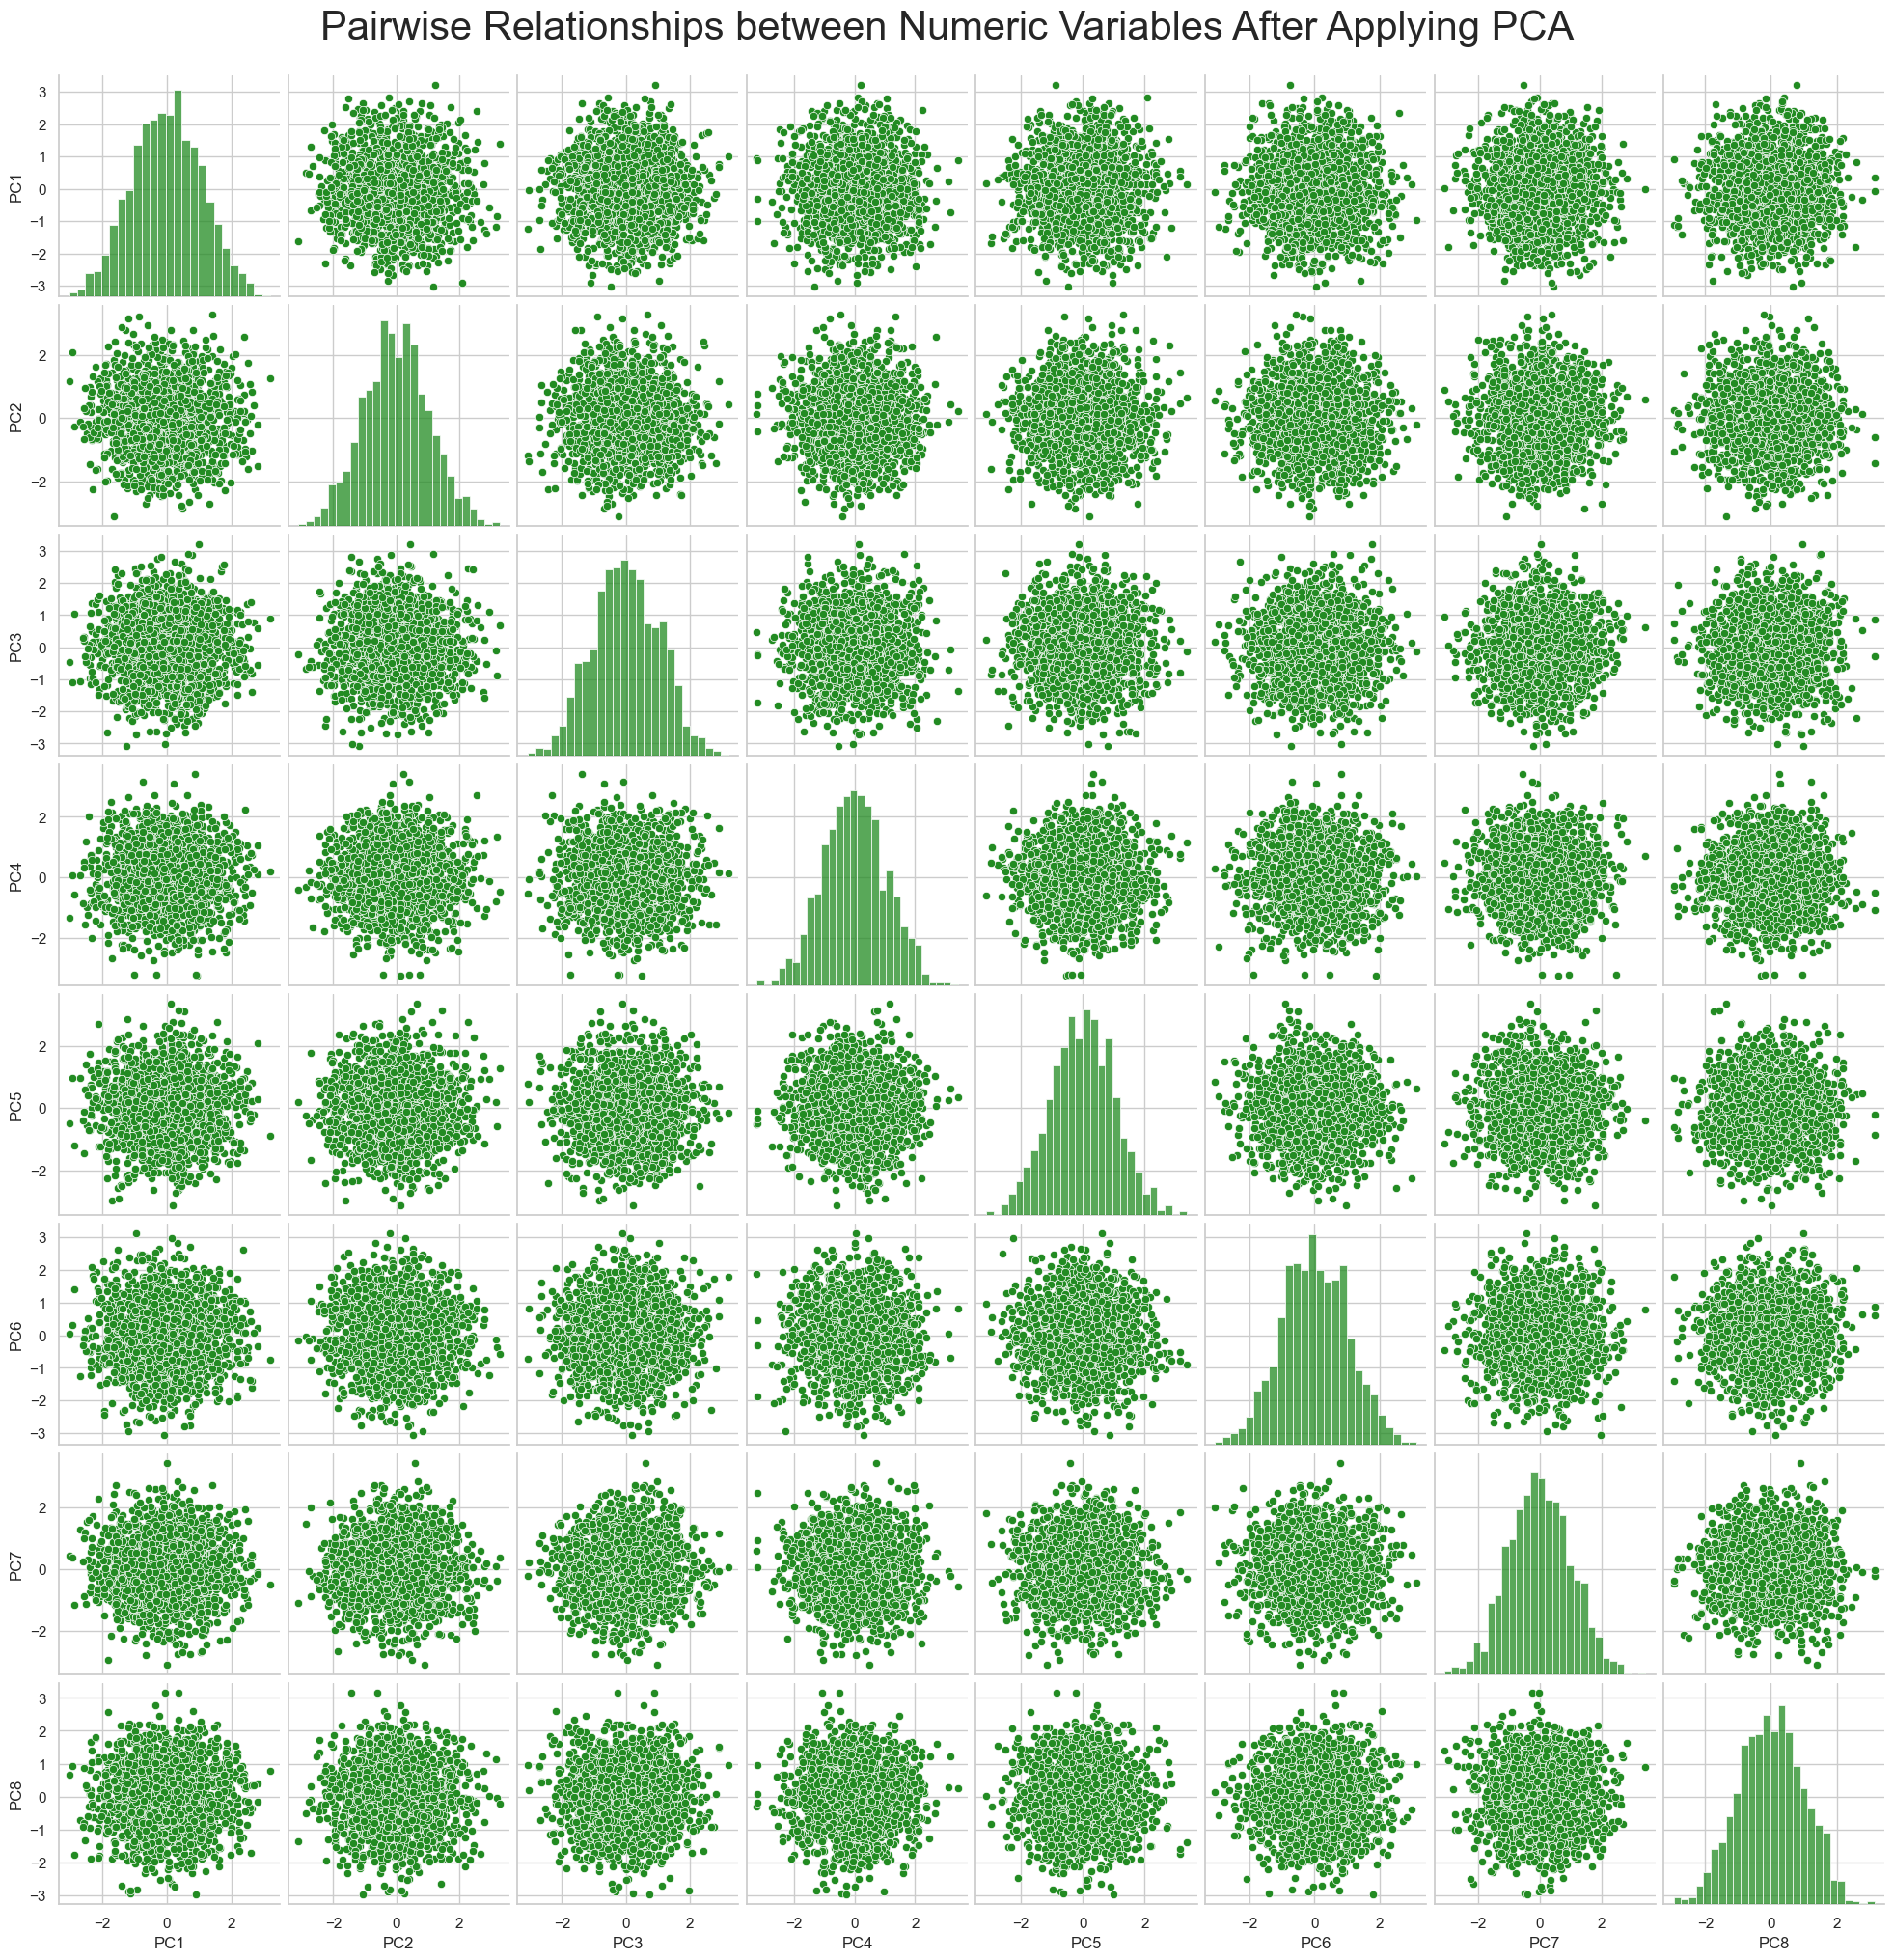

In [18]:
# Visualize pairwise relationships using scatterplots

## First apply dimensional reduction
## Combine data and scale
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_num_std)

## Apply PCA
pca = PCA()
principal_components = pca.fit_transform(scaled_data)

## Find cumulative variance explained
cumulative_variance_explained = np.cumsum(pca.explained_variance_ratio_)

## Save data frame of desired cumulative variance explained
desired_cve = 0.7
index_desired_percent = np.where(cumulative_variance_explained >= desired_cve)[0][0]
pca_df = pd.DataFrame(principal_components[:, :index_desired_percent])

## Fix column names
pca_column_names = [f"PC{i}" for i in range(1, index_desired_percent+1)]
pca_df.columns = pca_column_names

## Show pairwise relationships
sns.set(style="whitegrid")
sns.set_palette(["forestgreen"])
sns.pairplot(pca_df)
plt.suptitle("Pairwise Relationships between Numeric Variables After Applying PCA", fontsize=30, y=1.02)
plt.show()

## Modeling Implications continued

If we try an ordinary least-squares model where number of casualties is the response variable, we can see the results for this model using all the other variables as predictors lead to extremely small R-squared and adjusted R-squared values, and it is not a statistically significant model by the probability of the F-statistics. This is just one example of a potential response variable, but it does not seem like modeling with this data set would be simple.

Further feature engineering could be explored, but that is not the scope of this report. This could include adding potentially new variables from other existing variables, e.g. the time of day convert be converted to categories of afternoon, morning, night, etc. This could also involve exploring possibilities of interactions, but there are no current leads on which interactions could be valuable given the lack of apparent ways these variables interact that has been explored thus far.

Depending on what type of modeling is required, further analysis could be conducted in numerous ways. Non-linear interactions could be explored through machine learning techniques such as random forest regression along with the transformations of variables to lead to better fitting of models. Experts and their research could be consulted to understand potentially useful combinations of variables, transformations of variables, which variables would need to be included in the final model, features to create, more information to gather related to these crashes potentially to add to the data, and there are many other possibilites as well to work towards modeling the data.

In [19]:
# Modeling Implications continued

## Define X and y
y = df["Num_Casualties"]
X = df_combined.drop(columns=["Num_Casualties"])
X = sm.add_constant(X)

## Create and fit linear model
model = sm.OLS(y, X)
result = model.fit()

## Show results
display(result.summary().tables[0])

Dep. Variable:,Num_Casualties,R-squared:,0.062
Model:,OLS,Adj. R-squared:,0.001
Method:,Least Squares,F-statistic:,1.011
Date:,"Thu, 07 Mar 2024",Prob (F-statistic):,0.454
Time:,13:43:20,Log-Likelihood:,-2465.5
No. Observations:,1610,AIC:,5131.
Df Residuals:,1510,BIC:,5669.
Df Model:,99,,
Covariance Type:,nonrobust,,


# Summary and Conclusions

This analysis includes several important steps on the road accident data set provided by Farshid Bahrami on Kaggle including: exploratory data analysis (EDA), data cleaning, visualization, feature engineering, dimensional reduction, bivariate analysis, and modeling implications. Here is a summary of the key findings from this analysis:

1. **Data Overview**: The road accident data set contains information about various attributes related to road accidents across the United States, such as date, time, weather conditions, type of junction, vehicle type, and casualty counts. There are 1610 observations in total across 23 variables, 10 being categorical and 13 being numeric.
2. **Precaution About the Data**: It was noted that the data set lacked units for certain variables where units should be necessary, and this would be important in understanding the data for modeling for a practical application. It was also mentioned that the context of the missing values could be investigated in a real-world setting to examine if imputation at all would be advisable or if a certain type would be useful. The location and time of accidents also poses some questions about the nature of the data set. Observations seem to be begin at the beginning of 2024, but it unknown if this is where the start time is meant to begin. Location of accidents is not intuitively understood if this is supposed to include all accidents in 2024 up to the creation of the data set. All of these questions should be understood for a more thorough understanding. 
3. **Data Cleaning**: This initially involved imputing the median values for numeric variables and the mode values for categorical variables. However, this was found to disrupt the nature of the distributions for the variables with imputed data, so more nuanced imputation method were selected instead. Namely, random forest classifying was selected for the categorical variables and interpolation was selected for numerical variables. Errors in the data were also checked for by checking for duplicate values, and there were not found to be any.
4. **Feature Engineering**: Time variables were transformed into numeric forms by the date variable being converted into days since the first observation was recorded and time of day was converted into hours since midnight. One-hot encoding was conducted on categorical variables to prepare the data for modeling. Standardization of numeric variables was done to prepare the data for modeling. A final data set was created to combine the standardized numeric data with the one-hot-encoded categorical variables.
5. **EDA**: This involved visualizing numeric and categorical data to attempt to identify patterns in the data. This is where spikes in data where data was imputed initially was found, allowing this issue to be fixed. Histograms were used to examine numeric data sets and bar graphs were used for categorical variables. The variables appear to resemble roughly uniform distributions scaled differently to each variable. The data was found to not have any outliers or apparent errors and seemed to be ready to be prepared for modeling and further analysis.
6. **Bivariate Analysis**: This was conducted using correlation matrices, pairwise plots, and conducting Chi-square tests across all pairs of categorical variables. Overall, no correlation matricies had any results that were not extremely weak, random scatter resulted from pairwise plots, and only one pair of categorical variables were found to be associated, but given there were 45 tests conducted overall, this is actually less than the expected result just based on random chance. Overall, the variables appear to be very unrelated to each other without further analysis.
7. **Dimensionality Reduction**: Principle component analysis was employed to reduce the dimensionality of the data set while retaining the most significant information. The cumulative variance explained was examined through plotting and further analysis to be able to form data frames with optimal numbers of principle components.
8. **Modeling Implications**: Linear regression was attempted using ordinary least-squares (OLS) regression with the response variable as number of casualties. However, the model did not yield any significant results. This seems to indcate that predicting using these available variables would be challenging for this response variable. For modeling desires, more feature engineering could be explored as well as more advanced machine learning techniques such as random forest regression to find non-linear interactions of variables in data for better model performance. Experts and their research could be consulted that could have significant implications for this type of modeling.

In conclusion, this analysis demonstrates the importance of data preproccessing, explorary data analysis, and thoughtful model approaches in extracting insights from complex data sets. Further research, model exploration, and analysis could lead to valuable insights about this data, potentially for reducing road accident death, improving road safety measures, and improving road design.